# Capstone Project_CAP_1

Author: Gowtham Iyer

Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [194]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

## Loading the dataset

In [195]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [196]:
print(dataset.shape)

(10000, 12)


In [197]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


##Understanding the data

In [198]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.00

## Enumerating features

In [199]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

## Segregating independent variables (features) and the dependent variable (class variable) in the dataset

In [200]:
X = dataset.drop(columns='churn')
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       0   42       2       0.00   
1     15647311           608        2       0   41       1   83807.86   
2     15619304           502        0       0   42       8  159660.80   
3     15701354           699        0       0   39       1       0.00   
4     15737888           850        2       0   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  
0                1            1              1         101348.88  
1                1            0              1         112542.58  
2                3            1              0         113931.57  
3                2            0              0          93826.63  
4                1            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


# K Means Clustering

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of 'churn' class variable

<ipython-input-202-9cd05cbcb02f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['churn'], color='orange', bins=1)


<Axes: title={'center': 'Distribution Plot of "churn" variable'}, xlabel='churn', ylabel='Density'>

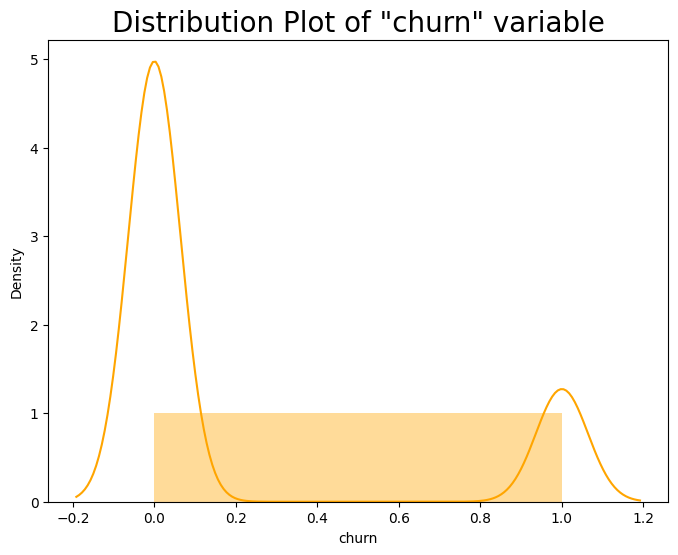

In [202]:
fig_bank_churn, ax = plt.subplots(figsize=(8, 6))
plt.title('Distribution Plot of "churn" variable', fontsize=20)
sns.distplot(dataset['churn'], color='orange', bins=1)


# Normalizing the dataset

In [203]:
dataset_dropped = dataset.drop('churn', axis=1)
X_kmeans = dataset_dropped.values[:, 1:]
dataset_cluster = StandardScaler().fit_transform(X_kmeans)

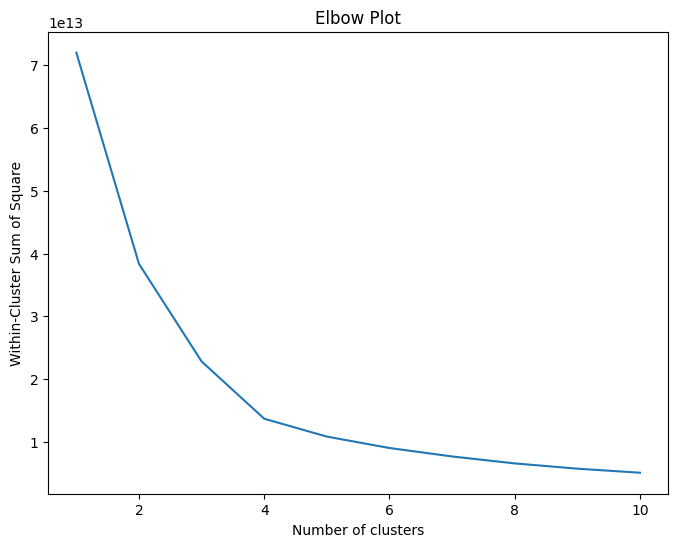

In [204]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 14, random_state = 0)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)
fig_k_mean, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

In [205]:
clusterNum = 3
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X_kmeans)
labels = k_means.labels_
print(labels)

[2 0 0 ... 2 1 1]


# Assigning lables to each row in dataframe

In [206]:
dataset_dropped['Clus_km'] = labels
print(dataset_dropped.head())

print(dataset_dropped.groupby('Clus_km').mean())

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       0   42       2       0.00   
1     15647311           608        2       0   41       1   83807.86   
2     15619304           502        0       0   42       8  159660.80   
3     15701354           699        0       0   39       1       0.00   
4     15737888           850        2       0   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  Clus_km  
0                1            1              1         101348.88        2  
1                1            0              1         112542.58        0  
2                3            1              0         113931.57        0  
3                2            0              0          93826.63        2  
4                1            1              1          79084.10        1  
          customer_id  credit_score   country    gender        age    tenure  \
Clus_km                  

# Creating 2-D graph

Text(0, 0.5, 'Estimated Salary')

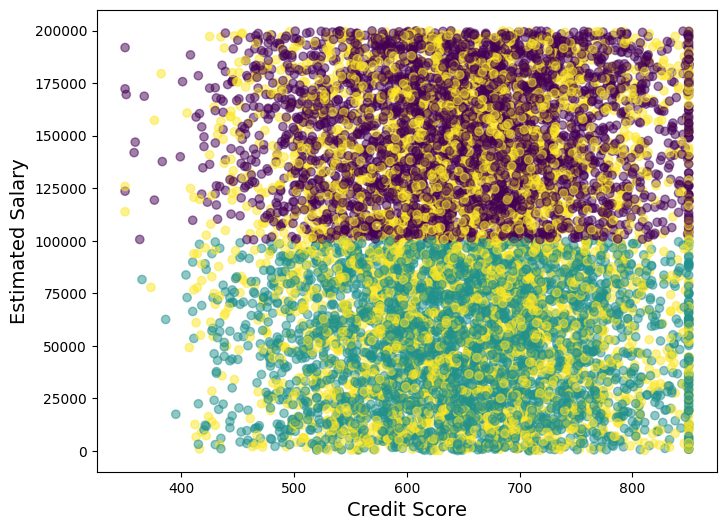

In [207]:
fig_2d, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_kmeans[:, 0], X_kmeans[:, 9], c=labels.astype(np.float64), alpha=.5)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)

# Creating 3-D graph

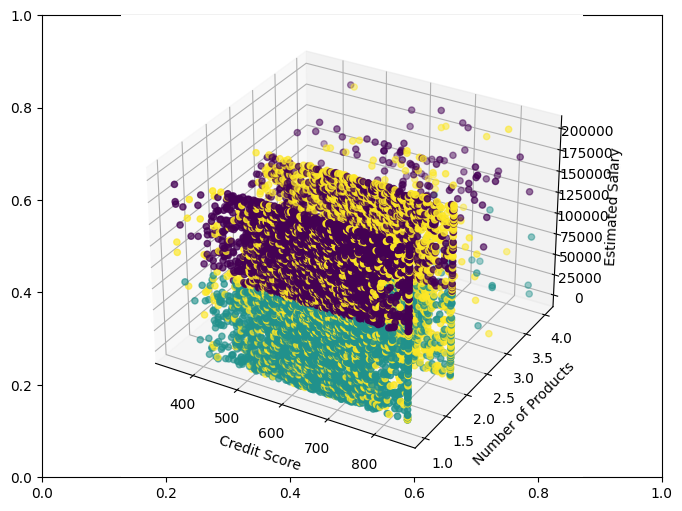

In [208]:
from mpl_toolkits.mplot3d import Axes3D
fig_3d, ax = plt.subplots(figsize=(8, 6))
ax = Axes3D(fig_3d, rect=[0, 0, 0.95, 1], elev=48, azim=134)

fig=plt.figure(1, figsize=(8, 8))
ax=fig.add_subplot(111,projection='3d')

ax.set_xlabel('Credit Score')
ax.set_ylabel('Number of Products')
ax.set_zlabel('Estimated Salary')

ax.scatter(X_kmeans[:, 0], X_kmeans[:, 6], X_kmeans[:, 9], c= labels.astype(np.float64))
plt.show()

# Re-initializing dataset to reset any stored values (due to Colab environment)

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns='churn')
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

## Splitting data for Training and Testing


In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 11)
(7000,)
(3000, 11)
(3000,)


## Creating Logistic Regression model and Training it

In [210]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluating the performance of Logistic Regression mode



In [211]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print(y_pred)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

report = classification_report(y_test, y_pred, labels=np.unique(y_pred))
#report = classification_report(y_test, y_pred)
print(report)

[0 0 0 ... 0 0 0]
Accuracy of logistic regression classifier on test set: 0.793
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379

   micro avg       0.79      1.00      0.88      2379
   macro avg       0.79      1.00      0.88      2379
weighted avg       0.79      1.00      0.88      2379



# Re-initializing dataset to reset any stored values (due to Colab environment)

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns='churn')
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

# Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Creating ANN model and Training it

In [212]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape, y_train.shape)

strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant=1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    y_pred = dclf.predict(X_test)
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
    test_scores.append(score)

(7000, 11) (7000,)
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379

   micro avg       0.79      1.00      0.88      2379
   macro avg       0.79      1.00      0.88      2379
weighted avg       0.79      1.00      0.88      2379

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2379
           1       0.21      0.21      0.21       621

    accuracy                           0.67      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.67      0.67      0.67      3000

              precision    recall  f1-score   support

           0       0.78      0.48      0.59      2379
           1       0.20      0.49      0.28       621

    accuracy                           0.48      3000
   macro avg       0.49      0.48      0.44      3000
weighted avg       0.66      0.48      0.53      3000

              precision    recall  f1-score   support


In [213]:
# Creating the keras model

from keras.models import Sequential
from keras.layers import Dense

def build_model():
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim = 11, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [214]:
# Defining early stopping

from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=60)

model_ann = build_model()

print(X_train.shape)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 12)                144       
                                                                 
 dense_40 (Dense)            (None, 8)                 104       
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(7000, 11)


In [215]:
# compiling the keras model

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
#history = model_ann.fit(X_train, y_train, epochs=500,
#                    batch_size=10, validation_split=0.1, callbacks=[es])
history = model_ann.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.1, callbacks=[es])

Epoch 1/500
630/630 [==============================] - 2s 2ms/step - loss: 0.5056 - accuracy: 0.7973 - val_loss: 0.4985 - val_accuracy: 0.8014
Epoch 2/500
630/630 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7973 - val_loss: 0.4990 - val_accuracy: 0.8014
Epoch 3/500
630/630 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.7973 - val_loss: 0.4984 - val_accuracy: 0.8014
Epoch 4/500
630/630 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7973 - val_loss: 0.4988 - val_accuracy: 0.8014
Epoch 5/500
630/630 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7973 - val_loss: 0.4986 - val_accuracy: 0.8014
Epoch 6/500
630/630 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7973 - val_loss: 0.4984 - val_accuracy: 0.8014
Epoch 7/500
630/630 [==============================] - 2s 3ms/step - loss: 0.5046 - accuracy: 0.7973 - val_loss: 0.4985 - val_accuracy: 0.8014

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


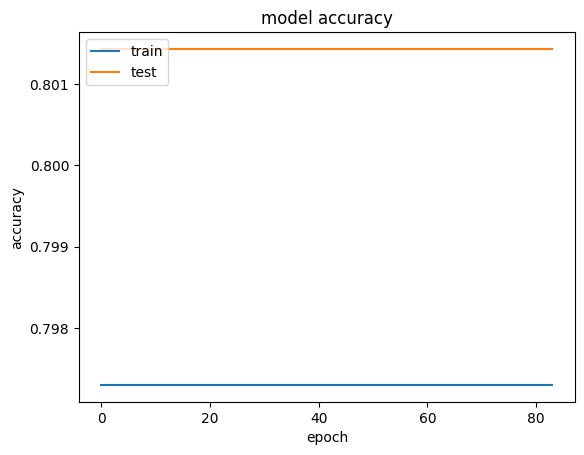

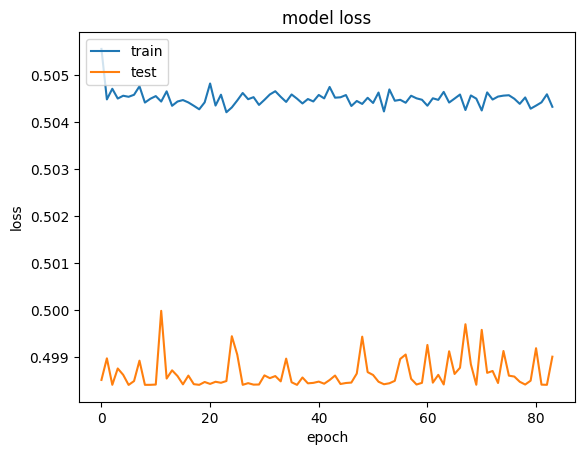

In [216]:
# Plotting Accuracy and Loss for the ANN model
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluating the performance of ANN model

In [222]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

y_pred = model_ann.predict(X_test)

binarizer = Binarizer(threshold=0.5)
y_pred_binary = binarizer.fit_transform(y_pred)

# reduce to 1d array
# y_pred = y_pred[:, 0]
y_pred_binary = y_pred_binary[:, 0]

#report = classification_report(y_test, y_pred_binary, labels=np.unique(y_pred), zero_division=1)
report = classification_report(y_test, y_pred_binary, zero_division=1)
print(report)

94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       1.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.90      0.50      0.44      3000
weighted avg       0.84      0.79      0.70      3000



# Re-initializing dataset to reset any stored values (due to Colab environment)

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Enumerating attributes
le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

# Segregating independent and class variables
X = dataset.drop(columns='churn')
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

# Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## Creating SVM model and Training it

In [223]:
from sklearn import svm

# Creating the SVM Classifier model
model_svm = svm.SVC(kernel='rbf', C=1e-0, gamma=1e-3) # Linear Kernel

# Training the model using the training set
model_svm.fit(X_train, y_train)

SVC(gamma=0.001)

# Evaluating the performance of SVM model

In [225]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

y_pred = model_svm.predict(X_test)

#binarizer = Binarizer(threshold=0.5)
#y_pred_binary = binarizer.fit_transform(y_pred)

# reduce to 1d array
#y_pred = y_pred[:, 0]
#y_pred_binary = y_pred_binary[:, 0]

#report = classification_report(y_test, y_pred_binary, labels=np.unique(y_pred), zero_division=1)
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

#dataset.diagnosis[dataset.diagnosis == 'M'] = 1
#dataset.diagnosis[dataset.diagnosis == 'B'] = 0

#ax = sns.heatmap(dataset)


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379
           1       1.00      0.00      0.00       621

    accuracy                           0.79      3000
   macro avg       0.90      0.50      0.44      3000
weighted avg       0.84      0.79      0.70      3000

